In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('alcohol-quality-data.csv')

In [3]:
data

,Quality_Category,density,pH,sulphates,alcohol
0,Low,1.001,3,0.45,8.8
1,Low,0.994,3,0.49,9.5
2,Low,0.995,3,0.44,10.1
3,Low,0.996,3,0.40,9.9
4,Low,0.996,3,0.40,9.9
...,...,...,...,...,...
4893,Low,0.991,3,0.50,11.2
4894,Low,0.995,3,0.46,9.6
4895,Low,0.993,3,0.46,9.4
4896,High,0.989,3,0.38,12.8


In [4]:
data.value_counts()

Quality_Category  density  pH  sulphates  alcohol
High              0.999    3   0.46       8.9        10
                  0.998    3   0.39       9.0         8
Low               0.995    3   0.48       9.5         8
High              0.998    3   0.41       8.8         8
Low               0.999    3   0.50       9.2         8
                                                     ..
                  0.991    4   0.43       11.7        1
                               0.48       11.2        1
                               0.49       11.3        1
                               0.62       11.7        1
                  1.039    3   0.69       11.7        1
Length: 3252, dtype: int64

In [5]:
data.isnull().sum()

Quality_Category    0
density             0
pH                  0
sulphates           0
alcohol             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quality_Category  4898 non-null   object 
 1   density           4898 non-null   float64
 2   pH                4898 non-null   int64  
 3   sulphates         4898 non-null   float64
 4   alcohol           4898 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 191.5+ KB


In [7]:
num_feature = [feature for feature in data.columns if data[feature].dtype !='O']

In [8]:
dataset = data.copy()

In [9]:
y = pd.DataFrame(dataset['Quality_Category'].replace({"Low":0, "High":1}))
x = dataset.drop(columns=['Quality_Category'])

In [10]:
y

,Quality_Category
0,0
1,0
2,0
3,0
4,0
...,...
4893,0
4894,0
4895,0
4896,1


In [11]:
x

,density,pH,sulphates,alcohol
0,1.001,3,0.45,8.8
1,0.994,3,0.49,9.5
2,0.995,3,0.44,10.1
3,0.996,3,0.40,9.9
4,0.996,3,0.40,9.9
...,...,...,...,...
4893,0.991,3,0.50,11.2
4894,0.995,3,0.46,9.6
4895,0.993,3,0.46,9.4
4896,0.989,3,0.38,12.8


Feature Selection

C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/1933997691.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


[0.16291962 0.00549636 0.43254596 0.39903806]


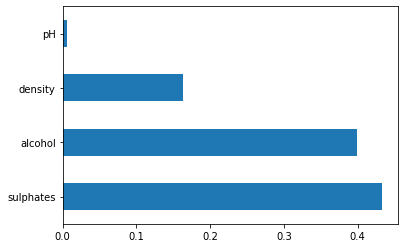

In [12]:
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

alcohol and sulphates are best suited columns

In [13]:
x.drop(['pH', 'density'], axis=1)

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9
...,...,...
4893,0.50,11.2
4894,0.46,9.6
4895,0.46,9.4
4896,0.38,12.8


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

Random Forest

In [15]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)

In [16]:
rfc.fit(x_train,y_train)

C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [17]:
y_pred = rfc.predict(x_test)

In [18]:
rfc.score(x_test, y_test)

0.8136054421768707

In [19]:
accuracy_score(y_test, y_pred)

0.8136054421768707

In [20]:
confusion_matrix(y_test, y_pred)

array([[1044,  117],
       [ 157,  152]], dtype=int64)

StratifiedKFold or randomforest

In [21]:
accuracy = []
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
    x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    rfc.fit(x1_train, y1_train)
    prediction = rfc.predict(x1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)

print(accuracy)
np.array(accuracy).mean()

C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/2973038051.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x1_train, y1_train)
C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/2973038051.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x1_train, y1_train)
C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/2973038051.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x1_train, y1_train)
C:\Users\ROBINS~1\AppData\Local\Temp/ipykernel_10220/2973038051.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(

[0.7714285714285715, 0.753061224489796, 0.7448979591836735, 0.8, 0.789795918367347, 0.810204081632653, 0.7122448979591837, 0.726530612244898, 0.7116564417177914, 0.6993865030674846]


0.7519206210091399

Decision Tree

In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7972789115646258

StratifiedKFold or decision tree

In [25]:
accuracy = []
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
    x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    dt.fit(x1_train, y1_train)
    prediction = dt.predict(x1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)

print(accuracy)
np.array(accuracy).mean()

[0.7673469387755102, 0.7224489795918367, 0.7061224489795919, 0.773469387755102, 0.7571428571428571, 0.7775510204081633, 0.6938775510204082, 0.7551020408163265, 0.6809815950920245, 0.6912065439672802]


0.73252493635491

KNN

In [26]:
scaler = MinMaxScaler()

In [27]:
x_scaler = scaler.fit_transform(x)

In [28]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x_scaler, y)

In [29]:
clf = KNeighborsClassifier(n_neighbors=125)

In [30]:
clf.fit(xs_train, ys_train)
y_pred = clf.predict(xs_test)
accuracy_score(y_pred, ys_test)

c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8040816326530612

StratifiedKFold or KNN

In [31]:
accuracy = []
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(xs_train,ys_train)
for train_index, test_index in skf.split(xs_train,ys_train):
    x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(x1_train, y1_train)
    prediction = clf.predict(x1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)

print(accuracy)
np.array(accuracy).mean()

c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was pas

[0.8505434782608695, 0.7880434782608695, 0.7418478260869565, 0.773841961852861, 0.7956403269754768, 0.8692098092643051, 0.8746594005449592, 0.7656675749318801, 0.7138964577656676, 0.7384196185286104]


c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\RobinSingh\MLDLProjects\MLDLEnvir\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7911769932472456

In [32]:
x

,density,pH,sulphates,alcohol
0,1.001,3,0.45,8.8
1,0.994,3,0.49,9.5
2,0.995,3,0.44,10.1
3,0.996,3,0.40,9.9
4,0.996,3,0.40,9.9
...,...,...,...,...
4893,0.991,3,0.50,11.2
4894,0.995,3,0.46,9.6
4895,0.993,3,0.46,9.4
4896,0.989,3,0.38,12.8


In [33]:
y

,Quality_Category
0,0
1,0
2,0
3,0
4,0
...,...
4893,0
4894,0
4895,0
4896,1


In [34]:
# x_new = x.drop(['pH', 'density'], axis=1)

In [35]:
import scipy.stats as stats

Feature Transformation

In [37]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    df[variable].hist()

    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

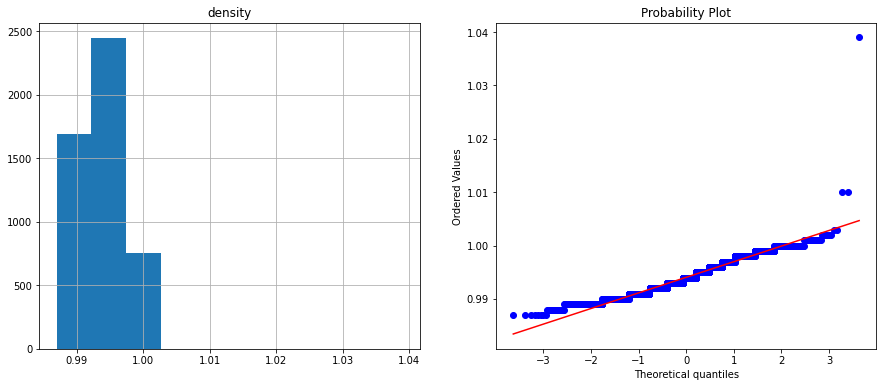

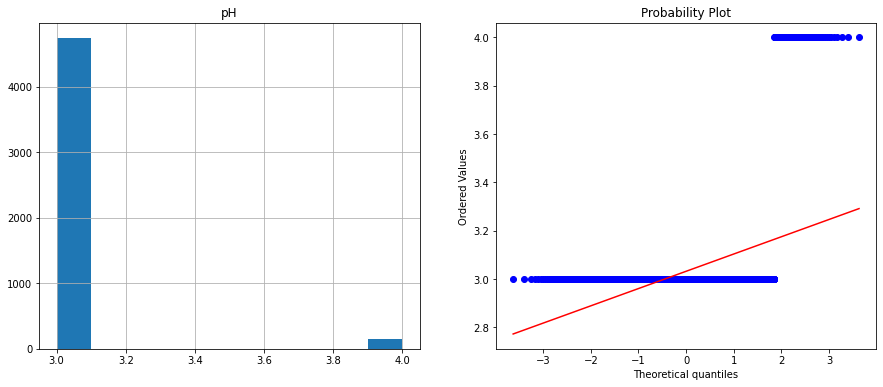

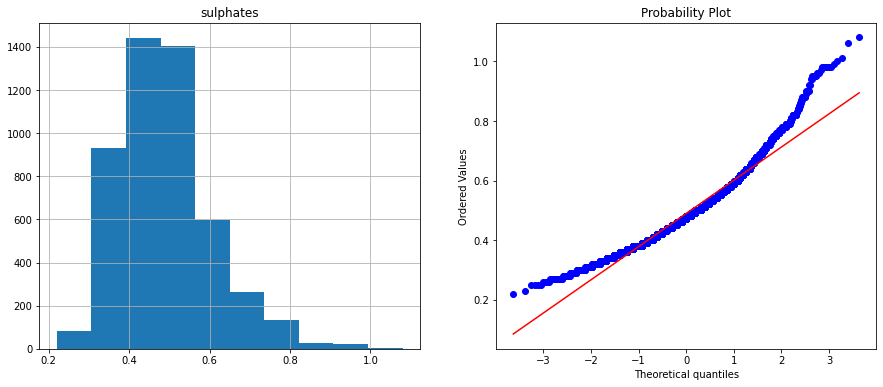

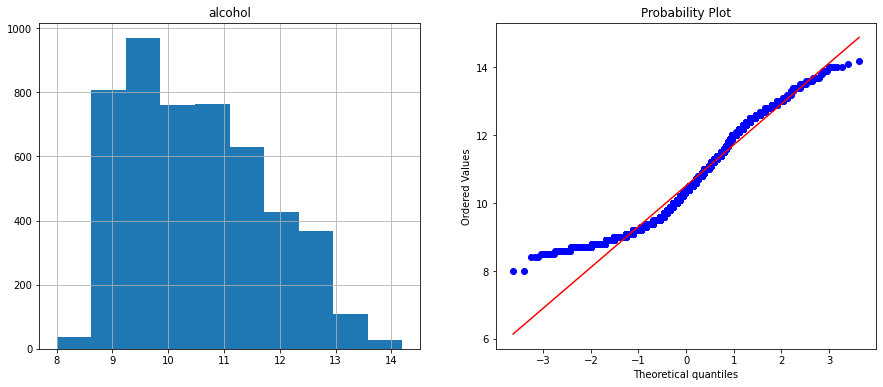

In [38]:
for feature in x.columns:
    x[feature], pram = stats.boxcox(x[feature]+1)
    diagnostic_plots(dataset, feature)